# **SUPPLY CHAIN MANAGEMENT PROJECT**




### **COMPANY OVERVIEW**

  A Fast Moving Consumer Goods (FMCG) company entered into the instant noodles business two years back. Their higher management has noticed that there is a mismatch in the demand and supply. Where the demand is high, supply is pretty low and vice-versa which results in a loss in inventory cost and ultimately loss to the company. Hence, the higher management wants to optimize the supply quantity in each and every warehouse in the entire country.

###  **DATA OVERVIEW**

 Due to variation in supply quantity, there is a case where an overloading of a Warehouse where there is low demand leading to oversupply. And vice versa where there is a case of underloading of supplies to warehouse leading undersupply.

 From the current data we need to understand the Warehouses which have oversupplied & undersupplied and to build a model based on the data, which can optimize supply quantity to the warehouse.

### **PROBLEM SOLVING APPROACH**

1.Exploratory Data Analysis (EDA): Understand the dataset, identify patterns, and gain insights into the business.

2.Data Preprocessing: Detecting and correcting corrupt or inaccurate records from a dataset, or and refers to identifying incorrect, incomplete, irrelevant parts of the data and then modifying, replacing, or deleting the dirty or coarse data.

3.Correlation Analysis: Investigate the relationships between variables to understand their impact on the target variable.

4.Data Visualization: Create visualizations to understand the distribution, relationships, and trends in the data.

5.Feature Engineering: Enhance the dataset by creating new features or modifying existing ones.

6.Model Building: Implement multiple machine learning algorithms to predict the optimum product weight.

7.Model Evaluation: Assess the performance of each model using metrics like Mean Squared Error and R-squared.

8.Model Comparison: Identify the best-performing model based on evaluation metrics.

### **EXPLORATORY DATA ANALYSIS (EDA)**

EDA is a data analytics process to understand the data in depth and learn the different data characteristics, often with visual means. This allows to get a better feel of data and find useful patterns in it.




## **Import Liabraries**

In [ ]:
# Importing Libraries and Loading Data


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# Loading train dataset
train_df = pd.read_csv("/content/supply_train.csv")

In [ ]:
# Displaying the first few rows of the train dataset
train_df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Ware_house_ID,WH_100000,WH_100001,WH_100002,WH_100003,WH_100004
WH_Manager_ID,EID_50000,EID_50001,EID_50002,EID_50003,EID_50004
Location_type,Urban,Rural,Rural,Rural,Rural
WH_capacity_size,Small,Large,Mid,Mid,Large
zone,West,North,South,North,North
WH_regional_zone,Zone 6,Zone 5,Zone 2,Zone 3,Zone 5
num_refill_req_l3m,3,0,1,7,3
transport_issue_l1y,1,0,0,4,1
Competitor_in_mkt,2,4,4,2,2


In [ ]:
# Shape of the train dataset
train_df.shape

(16620, 25)

In [ ]:
# Train dataset information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

The dataset contains 16620 rows and 25 columns.

Dataset includes int64, float64, and object datatypes.

1. **Ware_house_ID** corresponds to Product warehouse_id
2. **WH_Manager_ID** corresponds to Employee ID of warehouse manager
3. **Location_type** corresponds to Location of warehouse-like in city or village
4. **WH_capacity_size** corresponds to Storage capacity size of the warehouse
5. **zone** corresponds to Zone of the warehouse
6. **WH_regional_zone** corresponds to Regional zone of the warehouse under each zone
7. **num_refill_req_l3m** corresponds to Number of times refilling has been done in last 3 months
8. **transport_issue_l1y** corresponds to Any transport issue like accident or goods stolen reported in last one year
9. **Competitor_in_mkt** corresponds to Number of instant noodles competitors in the market
10. **retail_shop_num** corresponds to Number of the retail shop that sell the product under the warehouse area
11. **wh_owner_type** corresponds to Company is owning the warehouse or they have got the warehouse on rent
12. **distributor_num** corresponds to The number of distributer works in between warehouse and retail shops
13. **flood_impacted** corresponds to Warehouse is in the Flood impacted area indicator
14. **flood_proof** corresponds to Warehouse is a flood-proof indicator. Like storage is at some height not flood_proof
15. **electric_supply** corresponds to Warehouse have electric back up like generator, so they can run the warehouse in load shedding
16. **dist_from_hub** corresponds to Distance between warehouse to the production hub in Kms
17. **workers_num** corresponds to Number of workers working in the warehouse
18. **wh_est_year** corresponds to Warehouse established year
19. **storage_issue_reported_l3m** corresponds to Warehouse reported storage issue to corporate office in last 3 months. Like rat, fungus because of moisture etc
20. **temp_reg_mach** corresponds to Warehouse have temperature regulating machine indicator
21. **approved_wh_govt_certificate** corresponds to What kind of standard certificate has been issued to the warehouse from government regulatory body
22. **wh_breakdown_l3m** corresponds to Number of time warehouse face a breakdown in last 3 months. Like strike from worker, flood, or electrical failure
23. **govt_check_l3m** corresponds to Number of time government Officers have been visited the warehouse to check the quality and expire of stored food in last 3 months
24. **product_wg_ton** corresponds to Product has been shipped in last 3 months. Weight is in tons

In [ ]:
# Distribution of categorical variables
categorical_columns = train_df.select_dtypes(include=['object'])
for col in categorical_columns:
    print(train_df[col].value_counts())

Ware_house_ID
WH_100000    1
WH_111101    1
WH_111071    1
WH_111072    1
WH_111073    1
            ..
WH_105545    1
WH_105546    1
WH_105547    1
WH_105548    1
WH_116619    1
Name: count, Length: 16620, dtype: int64
WH_Manager_ID
EID_50000    1
EID_61101    1
EID_61071    1
EID_61072    1
EID_61073    1
            ..
EID_55545    1
EID_55546    1
EID_55547    1
EID_55548    1
EID_66619    1
Name: count, Length: 16620, dtype: int64
Location_type
Rural    15272
Urban     1348
Name: count, dtype: int64
WH_capacity_size
Large    6743
Mid      6691
Small    3186
Name: count, dtype: int64
zone
North    6800
West     5320
South    4223
East      277
Name: count, dtype: int64
WH_regional_zone
Zone 6    5568
Zone 5    3027
Zone 4    2756
Zone 2    1998
Zone 3    1937
Zone 1    1334
Name: count, dtype: int64
wh_owner_type
Company Owned    8975
Rented           7645
Name: count, dtype: int64
approved_wh_govt_certificate
C     3638
B+    3260
B     3220
A     3132
A+    2771
Name: count, dtyp

In [ ]:
# Distribution of numerical variables
numerical_columns = train_df.select_dtypes(include=['int','float'])
for col in numerical_columns:
    print(train_df[col].value_counts())

Unnamed: 0
0        1
11101    1
11071    1
11072    1
11073    1
        ..
5545     1
5546     1
5547     1
5548     1
16619    1
Name: count, Length: 16620, dtype: int64
num_refill_req_l3m
8    2032
3    1984
5    1967
7    1941
0    1900
4    1885
6    1857
1    1835
2    1219
Name: count, dtype: int64
transport_issue_l1y
0    10094
1     3072
2     1437
3     1272
4      508
5      237
Name: count, dtype: int64
Competitor_in_mkt
2     5790
3     4702
4     4438
5      825
6      375
1      291
7      136
8       49
10       6
9        6
12       1
0        1
Name: count, dtype: int64
retail_shop_num
4808    18
5022    17
4367    17
4611    16
4439    16
        ..
7176     1
3483     1
8522     1
7570     1
7347     1
Name: count, Length: 4356, dtype: int64
distributor_num
21    328
69    323
49    322
35    321
59    319
63    319
47    318
36    317
37    315
41    314
40    314
28    313
44    311
31    311
24    309
42    307
38    307
57    305
30    304
54    303
50    303
6

In [ ]:
train_df.describe()

,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,15953.000000,8760.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,8309.500000,4.126655,0.780927,3.103129,4983.904994,42.473706,0.096871,0.056017,0.655716,163.521901,28.911490,2009.345320,17.127196,0.306137,3.491095,18.727377,22098.420096
std,4797.925072,2.606241,1.206351,1.147711,1051.032239,16.090000,0.295791,0.229961,0.475149,62.701193,7.842046,7.544672,9.163901,0.460901,1.688614,8.619857,11620.337346
min,0.000000,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2093.000000
25%,4154.750000,2.000000,0.000000,2.000000,4309.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13057.000000
50%,8309.500000,4.000000,0.000000,3.000000,4856.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,19.000000,22099.000000
75%,12464.250000,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,16619.000000,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


## **DATA PREPROCESSING**



A real-world data generally contains noises, missing values, and maybe in an unusable format which cannot be directly used for machine learning models. Data preprocessing is required tasks for cleaning the data and making it suitable for a machine learning model which also increases the accuracy and efficiency of a machine learning model.

**DATA CLEANING**

In [ ]:
# Finding missing values
train_df.isnull().sum()

Unnamed: 0                         0
Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

Three columns contain null values:
* workers_num : no. of workers in the warehouse, dtype: integer
* wh_est_year : warehouse establishment year, dtype: integer
* approved_wh_govt_certificate : Type of approval warehouse having been issued by government, dtype: Object

In [ ]:
# Checking for any duplicates
train_df.duplicated().sum()

0

In [ ]:
# Removing unnecessary columns
train_df=train_df.drop(columns=['Unnamed: 0','Ware_house_ID','WH_Manager_ID','wh_est_year'])

In [ ]:
# Filling missing values with the mean
train_df['workers_num'].fillna(value=train_df['workers_num'].mean(), inplace=True)

# Filling missing values in the 'approved_wh_govt_certificate'
train_df['approved_wh_govt_certificate'].fillna(method='ffill', inplace=True)
train_df.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [ ]:
train_df.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num', 'flood_impacted',
       'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [ ]:
train_df.shape

(16620, 21)

In [ ]:
# Remove duplicate rows
train_df.drop_duplicates(inplace=True)
train_df

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,1,91,29.00000,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,0,1,210,31.00000,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,0,161,37.00000,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,...,0,0,103,21.00000,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,...,0,1,112,25.00000,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,Urban,Large,West,Zone 6,3,1,6,4779,Rented,70,...,0,0,240,19.00000,14,0,B+,5,23,16094
16616,Urban,Large,North,Zone 5,2,0,2,5718,Company Owned,26,...,0,1,164,30.00000,17,0,B+,6,24,21113
16617,Rural,Large,North,Zone 6,5,0,4,4514,Company Owned,50,...,0,1,211,24.00000,24,1,B,5,29,28117
16618,Rural,Small,West,Zone 6,3,2,3,5829,Rented,59,...,0,1,119,28.91149,16,0,A,5,15,21103


**TEST DATASET**

In [ ]:
# Loading test dataset
test_df = pd.read_csv('/content/supply_test.csv')

In [ ]:
# Displaying test dataset heads
test_df.head().T

,0,1,2,3,4
Unnamed: 0,16621,16622,16623,16624,16625
Ware_house_ID,WH_116621,WH_116622,WH_116623,WH_116624,WH_116625
WH_Manager_ID,EID_66621,EID_66622,EID_66623,EID_66624,EID_66625
Location_type,Rural,Rural,Rural,Rural,Urban
WH_capacity_size,Large,Large,Small,Mid,Mid
zone,North,North,North,West,North
WH_regional_zone,Zone 5,Zone 5,Zone 6,Zone 4,Zone 4
num_refill_req_l3m,5,5,3,5,6
transport_issue_l1y,0,0,0,2,0
Competitor_in_mkt,3,2,3,2,4


In [ ]:
# Test dataset shape
test_df.shape

(5529, 25)

In [ ]:
# Displaying information about the test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    5529 non-null   int64  
 1   Ware_house_ID                 5529 non-null   object 
 2   WH_Manager_ID                 5529 non-null   object 
 3   Location_type                 5529 non-null   object 
 4   WH_capacity_size              5529 non-null   object 
 5   zone                          5529 non-null   object 
 6   WH_regional_zone              5529 non-null   object 
 7   num_refill_req_l3m            5529 non-null   int64  
 8   transport_issue_l1y           5529 non-null   int64  
 9   Competitor_in_mkt             5529 non-null   int64  
 10  retail_shop_num               5529 non-null   int64  
 11  wh_owner_type                 5529 non-null   object 
 12  distributor_num               5529 non-null   int64  
 13  flo

In [ ]:
test_df.describe()

,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,5529.00000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5319.000000,2844.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000
mean,19385.00000,4.007235,0.765600,3.106167,4980.695424,42.128052,0.104178,0.049919,0.657262,163.899982,29.010528,2009.572785,17.085549,0.298426,3.477302,18.892205,22052.334599
std,1596.22915,2.604325,1.187567,1.128396,1049.617325,15.959934,0.305519,0.217797,0.474668,62.544704,7.848478,7.473201,9.206551,0.457609,1.700717,8.716737,11645.738485
min,16621.00000,0.000000,0.000000,1.000000,1953.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,18003.00000,2.000000,0.000000,2.000000,4310.000000,28.000000,0.000000,0.000000,0.000000,110.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,12143.000000
50%,19385.00000,4.000000,0.000000,3.000000,4863.000000,42.000000,0.000000,0.000000,1.000000,165.000000,28.000000,2010.000000,17.000000,0.000000,3.000000,21.000000,22099.000000
75%,20767.00000,6.000000,1.000000,4.000000,5492.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30099.000000
max,22149.00000,8.000000,5.000000,9.000000,10846.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55144.000000


In [ ]:
# DATA CLEANING FOR TEST DATASET

# Checking for any duplicates
test_df.duplicated().sum()

0

In [ ]:
# Removing unnecessary columns
test_df = test_df.drop(columns = ['Unnamed: 0','Ware_house_ID','WH_Manager_ID','wh_est_year'])

In [ ]:
test_df.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num', 'flood_impacted',
       'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [ ]:
# Filling missing values in the 'workers_num'
test_df['workers_num'].fillna(value=test_df['workers_num'].mean(), inplace=True)

# Filling missing values in the 'approved_wh_govt_certificate'
test_df['approved_wh_govt_certificate'].fillna(method='ffill', inplace=True)

In [ ]:
test_df.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [ ]:
test_df.shape

(5529, 21)

## **CORRELATION ANALYSIS**

The correlation matrix measures the linear relationship between pairs of features in a dataset. It provides an indication of how strongly and in what direction two features are related

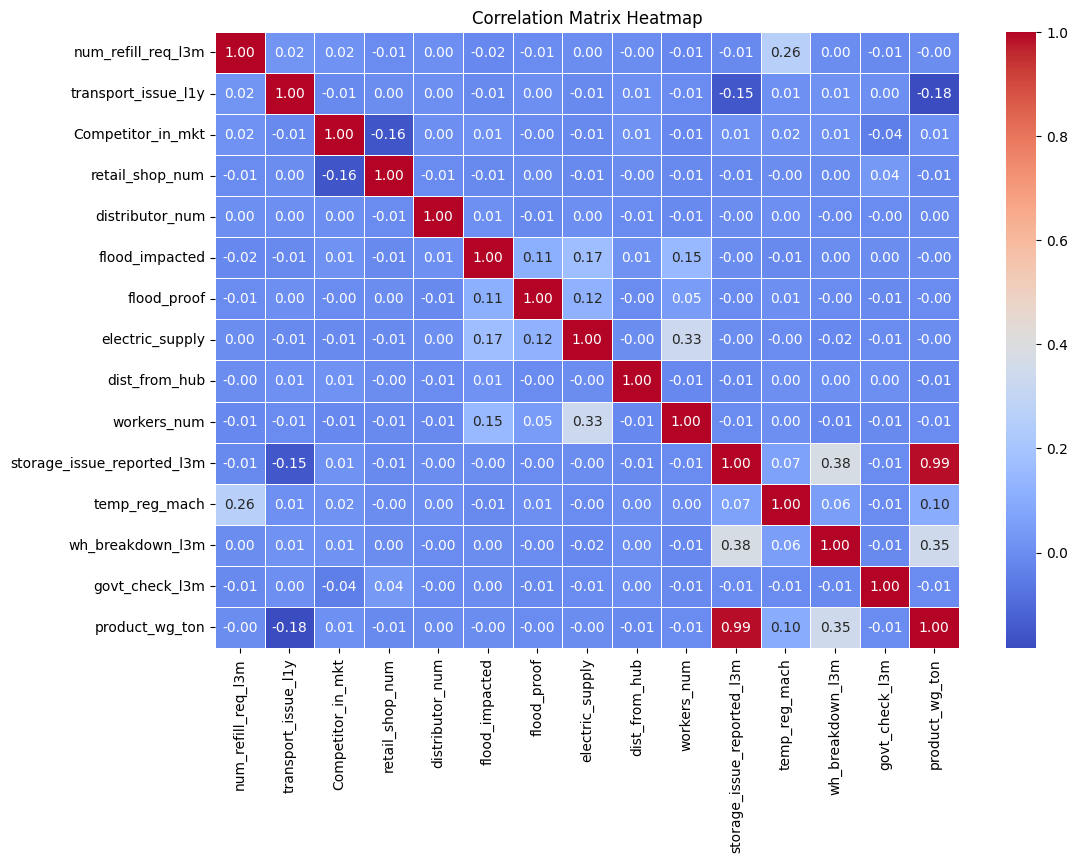

In [ ]:
# Correlation Matrix Heatmap

# Select only numerical columns for correlation analysis
numerical_columns=train_df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix for numerical columns
corr_matrix=numerical_columns.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Correlation heatmap shows the relationships between numerical variables.

From the correlation heatmap, we understand that **product_wg_ton** and **storage_issue_reported_l3m** are highly positive correlated.


## **DATA VISUALIZATION**

Data visualization is the representation of data through use of common graphics, such as charts, plots, infographics and even animations. These visual displays of information communicate complex data relationships and data-driven insights in a way that is easy to understand.

**Frequency of storage issues in last 3 months**

Text(0.5, 1.0, 'Frequency of Storage issue in the last 3 months')

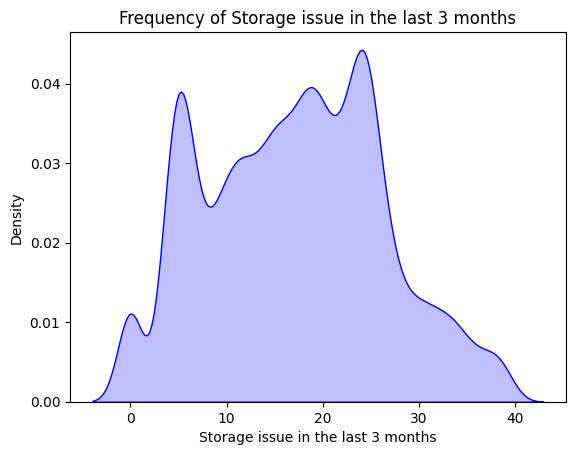

In [ ]:
# Plotting KDE plot for the frequency of storage issues in last 3 months

sns.kdeplot(data=train_df, x='storage_issue_reported_l3m', fill=True, color='blue')
plt.xlabel('Storage issue in the last 3 months')
plt.ylabel('Density')
plt.title('Frequency of Storage issue in the last 3 months')


Higher density of storage issues shown between 20-30

**Product weight by storage issues in the last three months**

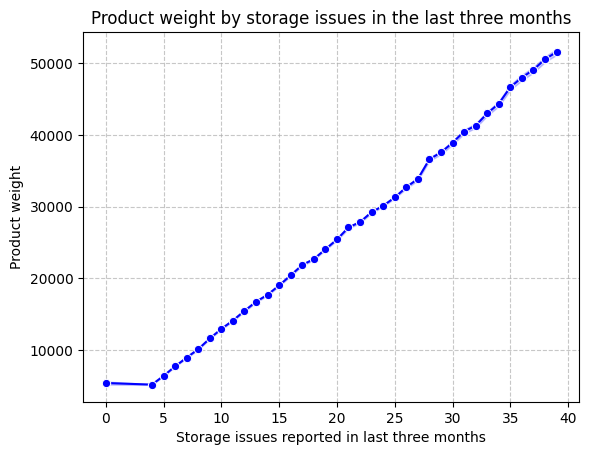

In [ ]:
# Plotting line plot for product weight by storage issues in the last three months

sns.lineplot(data=train_df, x='storage_issue_reported_l3m', y='product_wg_ton', color='blue', marker='o')
plt.xlabel('Storage issues reported in last three months')
plt.ylabel('Product weight')
plt.title('Product weight by storage issues in the last three months')
plt.grid(True, linestyle='--', alpha=0.7)

The more the product weight, the more the storage issues received

**Warehouse Location**

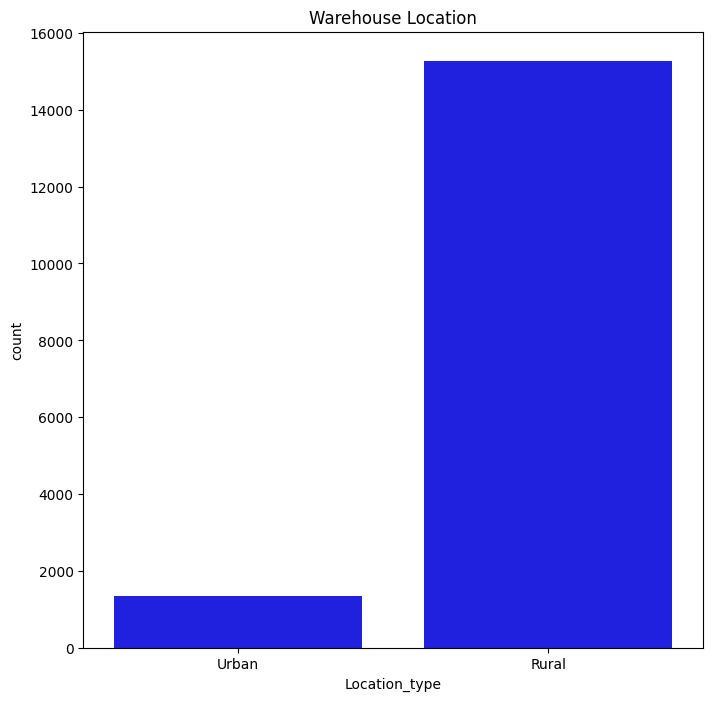

In [ ]:
# Plotting a countplot for the warehouse location

plt.figure(figsize=(8,8))
sns.countplot(x='Location_type',data=train_df, color='blue')
plt.title("Warehouse Location")
plt.show()

Most of the warehouses are situated in Rural area compared with the Urban area

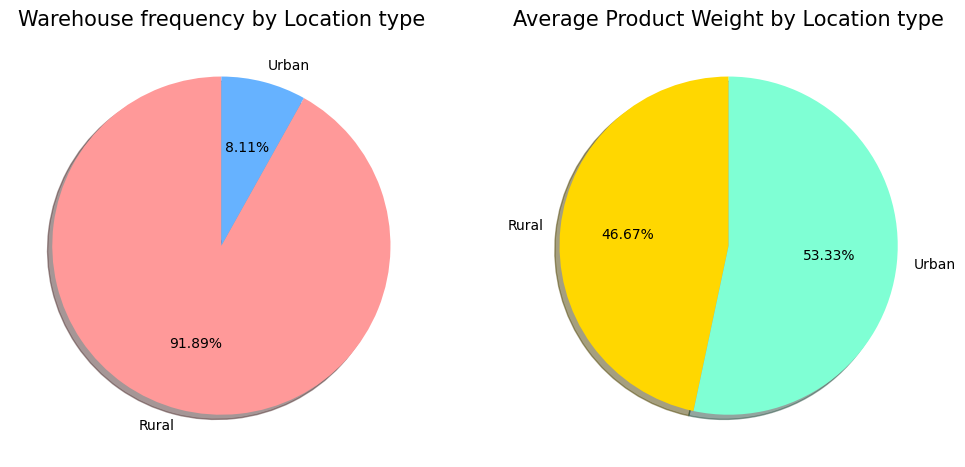

In [ ]:
# Plotting Pie chart for Warehouse location

labels = ['Rural', 'Urban']
size_total = train_df['Location_type'].value_counts().tolist()

# Pie chart colors
color_freq = ['#FF9999', '#66B2FF']
color_weight = ['#FFD700', '#7FFFD4']

size_mean = train_df.groupby('Location_type')['product_wg_ton'].mean().to_list()

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Pie chart for frequency
axes[0].pie(size_total, colors= color_freq, labels= labels, autopct='%.2f%%', shadow= True, startangle=90)
axes[0].set_title('Warehouse frequency by Location type', fontsize=15)

# Pie chart for average product weight
axes[1].pie(size_mean, colors= color_weight, labels= labels, autopct='%.2f%%', shadow= True, startangle=90)
axes[1].set_title('Average Product Weight by Location type', fontsize=15)

plt.tight_layout
plt.show()


92% of warehouses are located in Rural area and the rest of them are located in the Urban area.

Average product weight of Urban area is 53.42% and the Rural area is 46.58%

**Demand distribution across zones**

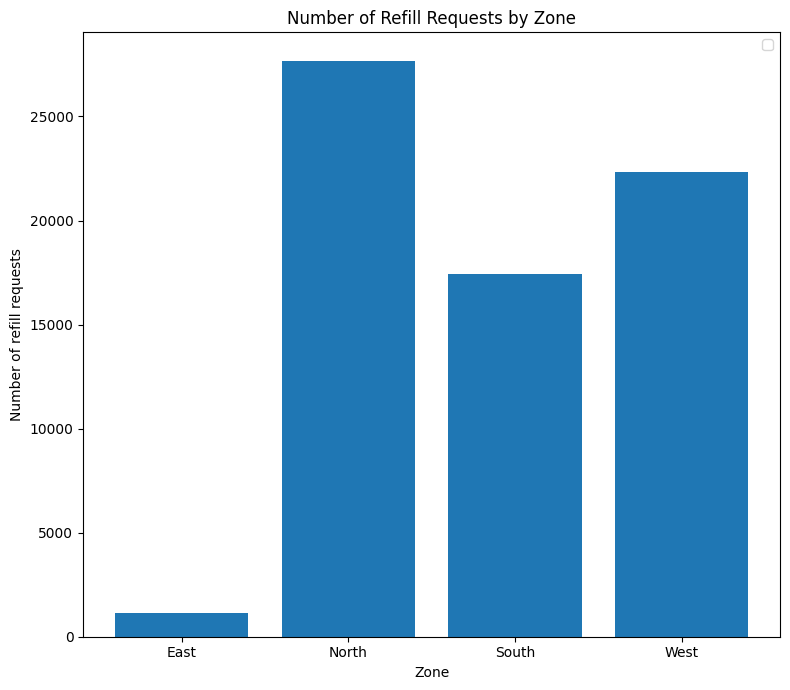

In [ ]:
# Plotting bar plot for the number of refill request by zones

# Group the data by zone

grouped_data = train_df.groupby('zone').sum().reset_index()

plt.figure(figsize=(8,7))
plt.bar(grouped_data['zone'], grouped_data['num_refill_req_l3m'])
plt.xlabel('Zone')
plt.ylabel('Number of refill requests')
plt.title('Number of Refill Requests by Zone')
plt.legend()
plt.tight_layout()
plt.show()

North zone has made the maximum number of refill requests, followed by West and South zones and the East zone has the minimum number of refill requests.

**Average Product Weight by Warehouse breakdown in the last three months**

Text(0.5, 1.0, 'Average Product Weight by Warehouse Breakdown in the last 3 months')

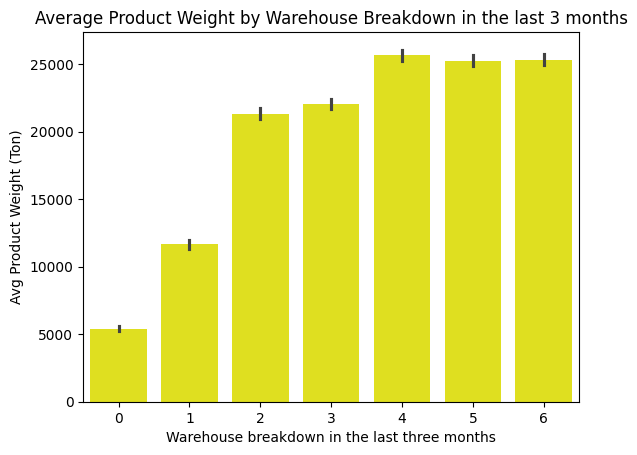

In [ ]:
# Plotting a bar plot for Avg Product Weight by Warehouse Breakdown in the last three months

sns.barplot(data=train_df, x='wh_breakdown_l3m', y='product_wg_ton', color='yellow')
plt.xlabel('Warehouse breakdown in the last three months')
plt.ylabel('Avg Product Weight (Ton)')
plt.title('Average Product Weight by Warehouse Breakdown in the last 3 months')

**Zonal distribution of warehouses**

In [ ]:
# Plotting pie chart for product weight by zone

# Calculate distribution percentage zone wise

total_weight = train_df['product_wg_ton'].sum()
train_df['percentage'] = (train_df['product_wg_ton']/total_weight)*100

weight_by_zone = train_df.groupby('zone')['percentage'].sum()
weight_by_zone

zone
East      1.701141
North    41.079075
South    25.199206
West     32.020577
Name: percentage, dtype: float64

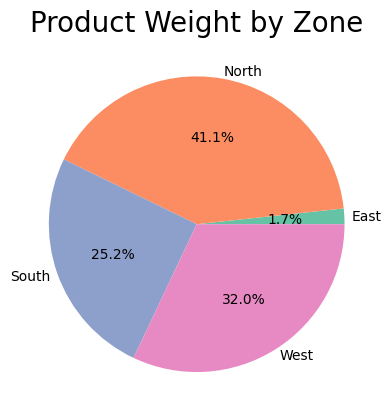

In [ ]:
labels = ['East', 'North', 'South', 'West']
color_palette = sns.color_palette('Set2')
plt.pie(weight_by_zone, labels = labels, colors = color_palette, autopct = '%1.1f%%', labeldistance = 1.05)
plt.title('Product Weight by Zone', fontsize = 20)
plt.show()

* Large proportion of products are shipped to North - 41.2%
* Least proportion of products are shipped to East - 1.5%

**Warehouse having temperature regulating machine**

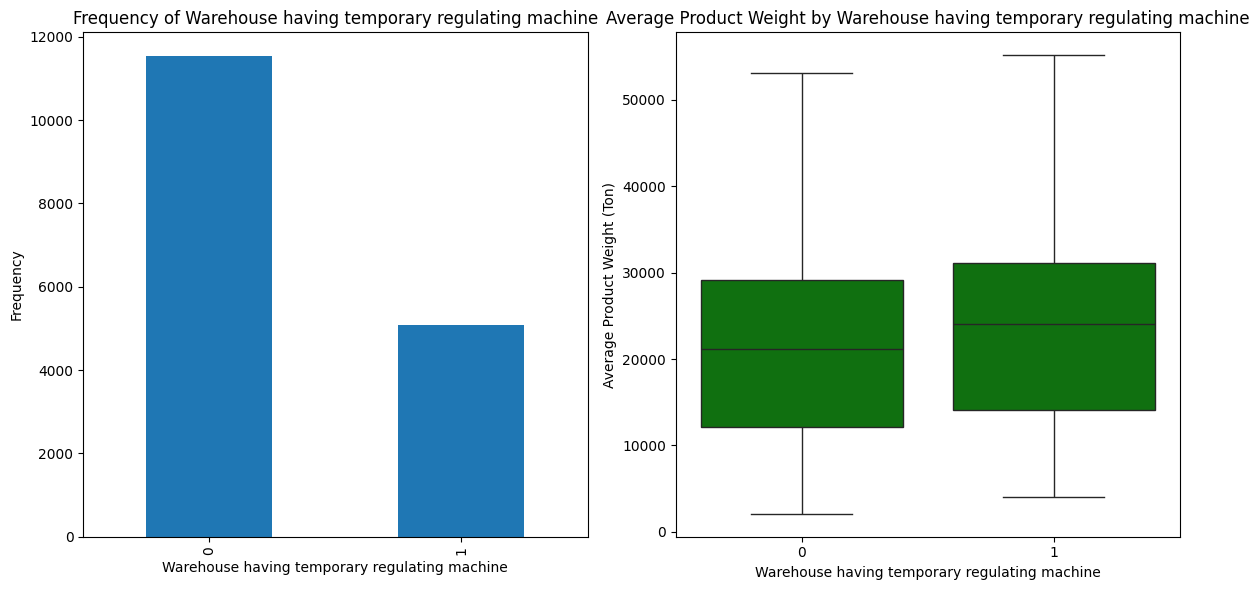

In [ ]:
# Set up subplots

fig, axes = plt.subplots(1, 2, figsize = (12, 6))

#Plotting bar chart

train_df['temp_reg_mach'].value_counts().sort_index().plot(kind = 'bar', ax = axes[0])
axes[0].set_xlabel('Warehouse having temporary regulating machine')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Warehouse having temporary regulating machine')

# Plotting box plot

sns.boxplot(data = train_df, x = 'temp_reg_mach', y = 'product_wg_ton', color = 'green', ax = axes[1])
axes[1].set_xlabel('Warehouse having temporary regulating machine')
axes[1].set_ylabel('Average Product Weight (Ton)')
axes[1].set_title('Average Product Weight by Warehouse having temporary regulating machine')

plt.tight_layout()
plt.show()

**Transport issues in last 1 year**

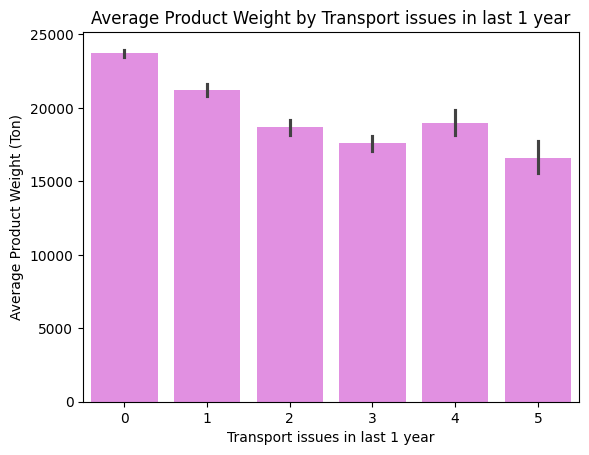

In [ ]:
# Plotting bar chart for transport issues in last 1 year

order = train_df['transport_issue_l1y'].unique()
order.sort()
sns.barplot(data = train_df, x = 'transport_issue_l1y', y = 'product_wg_ton', color = 'violet', order = order)
plt.xlabel('Transport issues in last 1 year')
plt.ylabel('Average Product Weight (Ton)')
plt.title('Average Product Weight by Transport issues in last 1 year')
plt.show()

**Competitors in the market**

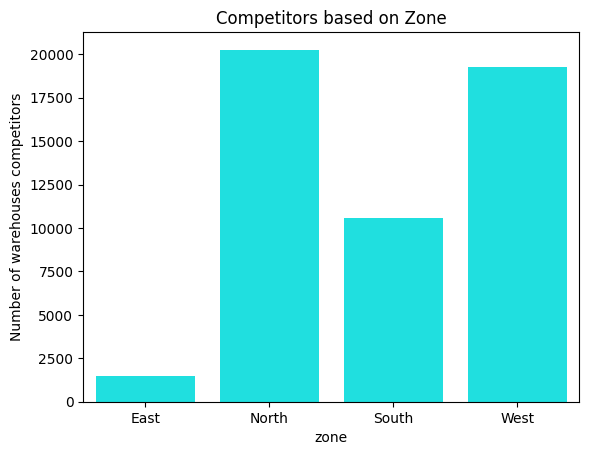

In [ ]:
# Plotting bar chart for competitors in the market

# Count the number of competitors in each zone

competitors = train_df.groupby('zone')['Competitor_in_mkt'].sum()

sns.barplot(competitors, color = 'cyan')
plt.xlabel('zone')
plt.ylabel('Number of warehouses competitors')
plt.title('Competitors based on Zone')
plt.show()

Most of the competitors are concentrated in the North zone and least are focused in the East zone

**Number of Workers**

Text(0.5, 1.0, 'Frequency of workers number')

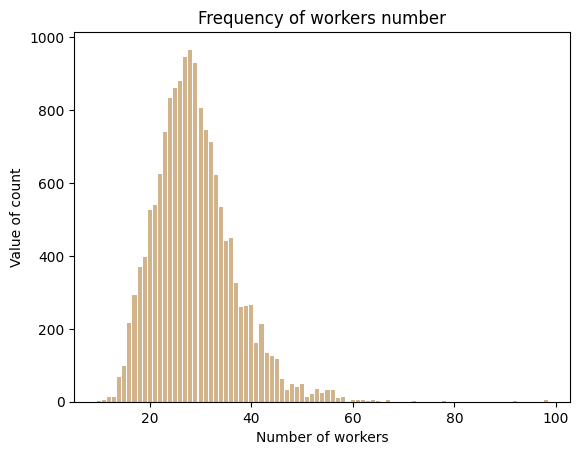

In [ ]:
# Plotting bar plot for Number of Workers

x = train_df['workers_num'].value_counts()

plt.bar(x.index, x.values, color = 'tan')
plt.xlabel('Number of workers')
plt.ylabel('Value of count')
plt.title('Frequency of workers number', fontsize = 12)

# **Label Encoding**

Label encoding is a process of assigning numerical labels to categorical data values. It is a simple and efficient way to convert categorical data into numerical data that can be used for analysis and modelling.

**Train Dataset**

In [ ]:
# Import the LabelEncoder class from scikit-learn
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Convert variables using Label Encoding
le = LabelEncoder()
cate_variables = ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate']
for col in cate_variables:
  train_df[col] = le.fit_transform(train_df[col])

train_df

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,percentage
0,1,2,3,5,3,1,2,4651,1,24,...,1,91,29.00000,13,0,0,5,15,17115,0.004660
1,0,0,1,4,0,0,4,6217,0,47,...,1,210,31.00000,4,0,0,3,17,5074,0.001382
2,0,1,2,1,1,0,4,4306,0,64,...,0,161,37.00000,17,0,0,6,22,23137,0.006300
3,0,1,1,2,7,4,2,6000,1,50,...,0,103,21.00000,17,1,1,3,27,22115,0.006021
4,0,0,1,4,3,1,2,4740,0,42,...,1,112,25.00000,18,0,4,6,24,24071,0.006554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,1,0,3,5,3,1,6,4779,1,70,...,0,240,19.00000,14,0,3,5,23,16094,0.004382
16616,1,0,1,4,2,0,2,5718,0,26,...,1,164,30.00000,17,0,3,6,24,21113,0.005749
16617,0,0,1,5,5,0,4,4514,0,50,...,1,211,24.00000,24,1,2,5,29,28117,0.007656
16618,0,2,3,5,3,2,3,5829,1,59,...,1,119,28.91149,16,0,0,5,15,21103,0.005746


In [ ]:
train_df = train_df.drop(['percentage'], axis=1)
train_df

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,5,3,1,2,4651,1,24,...,1,1,91,29.00000,13,0,0,5,15,17115
1,0,0,1,4,0,0,4,6217,0,47,...,0,1,210,31.00000,4,0,0,3,17,5074
2,0,1,2,1,1,0,4,4306,0,64,...,0,0,161,37.00000,17,0,0,6,22,23137
3,0,1,1,2,7,4,2,6000,1,50,...,0,0,103,21.00000,17,1,1,3,27,22115
4,0,0,1,4,3,1,2,4740,0,42,...,0,1,112,25.00000,18,0,4,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,1,0,3,5,3,1,6,4779,1,70,...,0,0,240,19.00000,14,0,3,5,23,16094
16616,1,0,1,4,2,0,2,5718,0,26,...,0,1,164,30.00000,17,0,3,6,24,21113
16617,0,0,1,5,5,0,4,4514,0,50,...,0,1,211,24.00000,24,1,2,5,29,28117
16618,0,2,3,5,3,2,3,5829,1,59,...,0,1,119,28.91149,16,0,0,5,15,21103


**Splitting Train data into predictor variables(X) and target variable(y)**

In [ ]:
X_train = train_df.drop(['product_wg_ton'], axis = 1)
y_train = train_df['product_wg_ton']

In [ ]:
X_train.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,1,2,3,5,3,1,2,4651,1,24,0,1,1,91,29.0,13,0,0,5,15
1,0,0,1,4,0,0,4,6217,0,47,0,0,1,210,31.0,4,0,0,3,17
2,0,1,2,1,1,0,4,4306,0,64,0,0,0,161,37.0,17,0,0,6,22
3,0,1,1,2,7,4,2,6000,1,50,0,0,0,103,21.0,17,1,1,3,27
4,0,0,1,4,3,1,2,4740,0,42,1,0,1,112,25.0,18,0,4,6,24


In [ ]:
y_train.head()

0    17115
1     5074
2    23137
3    22115
4    24071
Name: product_wg_ton, dtype: int64

**Test Dataset**

In [ ]:
# Import the LabelEncoder class from scikit-learn
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Convert variables using Label Encoding
le = LabelEncoder()
cate_variables = ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate']
for col in cate_variables:
  test_df[col] = le.fit_transform(test_df[col])

test_df

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,0,1,4,5,0,3,5590,0,15,...,0,0,156,30.000000,24,0,0,2,5,30132
1,0,0,1,4,5,0,2,5856,0,40,...,0,1,79,31.000000,5,1,4,2,24,6075
2,0,2,1,5,3,0,3,4803,1,40,...,0,1,70,41.000000,19,1,1,5,9,24076
3,0,1,3,3,5,2,2,4784,1,15,...,0,1,255,33.000000,9,1,1,3,11,13092
4,1,1,1,3,6,0,4,3699,1,24,...,0,0,205,20.000000,25,0,2,4,26,29071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,0,0,1,5,8,1,3,5030,1,46,...,0,1,203,28.000000,22,1,1,2,4,29138
5525,0,2,2,5,3,1,3,4320,1,60,...,0,0,170,29.010528,26,0,4,5,9,33108
5526,0,0,1,5,7,2,2,5268,0,64,...,0,0,99,22.000000,20,0,3,6,4,24072
5527,0,0,1,5,6,2,4,4378,1,32,...,0,0,220,17.000000,13,0,2,3,28,15055


**Splitting Test data into predictor variables(X) and target variable(y)**

In [ ]:
X_test = test_df.drop(['product_wg_ton'], axis = 1)
y_test = test_df['product_wg_ton']

In [ ]:
X_test.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,0,0,1,4,5,0,3,5590,0,15,0,0,0,156,30.0,24,0,0,2,5
1,0,0,1,4,5,0,2,5856,0,40,0,0,1,79,31.0,5,1,4,2,24
2,0,2,1,5,3,0,3,4803,1,40,0,0,1,70,41.0,19,1,1,5,9
3,0,1,3,3,5,2,2,4784,1,15,0,0,1,255,33.0,9,1,1,3,11
4,1,1,1,3,6,0,4,3699,1,24,0,0,0,205,20.0,25,0,2,4,26


In [ ]:
y_test.head()

0    30132
1     6075
2    24076
3    13092
4    29071
Name: product_wg_ton, dtype: int64

In [ ]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(5529, 20)
(5529,)
(16620, 20)
(16620,)


## **Model Building**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## **1. Linear Regression**

Linear Regression is an Machine Learning algorithm used for supervised learning. Linear Regression performs the task to predict a dependent variable(target) based on the given independent variable(s).

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled,y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_pred


array([31589.02556882,  7707.59060043, 25317.58523922, ...,
       24373.21524456, 16459.65334575, 12745.98475873])

In [ ]:
# Evaluating model performance
lr_mse = mean_squared_error(lr_pred,y_test)
lr_r2score =r2_score(lr_pred,y_test)
lr_mae = mean_absolute_error(lr_pred,y_test)
print(f'Linear Regression - MSE : {lr_mse}, R Squared : {lr_r2score}, MAE : {lr_mae}')

Linear Regression - MSE : 2979281.3102811184, R Squared : 0.9773895463169667, MAE : 1289.8884026312746


## **2. Decision Tree Regressor**

A Decision Tree is a simple representation for classifying examples. It is a Supervised Machine Learning where the data is continuously split according to a certain parameter.

In [ ]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train_scaled,y_train)
dt_pred = dt_reg.predict(X_test_scaled)
dt_pred

array([31073.,  6077., 24109., ..., 23079., 16084., 14097.])

In [ ]:
# Evaluating model performance
dt_mse = mean_squared_error(dt_pred,y_test)
dt_r2score =r2_score(dt_pred,y_test)
dt_mae = mean_absolute_error(dt_pred,y_test)
print(f'Linear Regression - MSE : {dt_mse}, R Squared : {dt_r2score}, MAE : {dt_mae}')

Linear Regression - MSE : 1765557.6632302406, R Squared : 0.987042326813042, MAE : 890.5964912280701


## **3. Random Forest Regressor**

The Random Forest Classifier is a set of decision trees from randomly selected subset of training set. It aggregates the votes from different decision trees to decide the final class of the test object. It is an ensemble tree-based learning algorithm.

In [ ]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_scaled,y_train)
rf_pred = rf_reg.predict(X_test_scaled)
rf_pred

array([30769.84,  6772.38, 25270.18, ..., 23574.9 , 15238.41, 13896.12])

In [ ]:
# Evaluating model performance
rf_mse = mean_squared_error(rf_pred,y_test)
rf_r2score =r2_score(rf_pred,y_test)
rf_mae = mean_absolute_error(rf_pred,y_test)
print(f'Linear Regression - MSE : {rf_mse}, R Squared : {rf_r2score}, MAE : {rf_mae}')

Linear Regression - MSE : 906481.7945769399, R Squared : 0.9932957917918545, MAE : 705.8335883523241


## **4. Support Vector Machine (SVR)**

SVM or Support Vector Machine is a linear model for classification and regression problems. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to seperate different classes. SVM generates optimal hyperplane in an iterative manner,which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that divides the dataset into classes.

In [ ]:
svr_model = SVR()
svr_model.fit(X_train_scaled,y_train)
svr_pred = svr_model.predict(X_test_scaled)
svr_pred

array([22250.7448877 , 21663.01610731, 22260.91969213, ...,
       22167.83752643, 21860.40608571, 22032.43781237])

In [ ]:
# Evaluating model performance
svr_mse = mean_squared_error(svr_pred,y_test)
svr_r2score =r2_score(svr_pred,y_test)
svr_mae = mean_absolute_error(svr_pred,y_test)
print(f'Linear Regression - MSE : {svr_mse}, R Squared : {svr_r2score}, MAE : {svr_mae}')

Linear Regression - MSE : 130123535.02924101, R Squared : -1906.2556785277447, MAE : 9411.573030763962


## **5. XGBoost Regressor**

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting(also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment(Hadoop, SDE, MPI) and can solve problems beyond billions of examples.

In [ ]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_pred

array([30679.703 ,  6993.3667, 26087.2   , ..., 23868.562 , 15053.072 ,
       13652.743 ], dtype=float32)

In [ ]:
# Evaluating model performance
xgb_mse = mean_squared_error(xgb_pred,y_test)
xgb_r2score =r2_score(xgb_pred,y_test)
xgb_mae = mean_absolute_error(xgb_pred,y_test)
print(f'Linear Regression - MSE : {xgb_mse}, R Squared : {xgb_r2score}, MAE : {xgb_mae}')

Linear Regression - MSE : 1201858.5656784691, R Squared : 0.9905566353035863, MAE : 814.2956495721423


## **6. Neural Network**

Neural Networks are computational models that mimic the complex functions of the human brain. The neural networks consist of interconnected nodes or neurons that process and learn from data, enabling tasks such as pattern recognition and decision making in machine learning.

In [ ]:
nn_model = MLPClassifier(max_iter=1000)
nn_model.fit(X_train_scaled, y_train)
nn_pred = nn_model.predict(X_test_scaled)
nn_pred

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


array([31133,  7117, 23076, ..., 25120, 17056, 23078])

In [ ]:
# Evaluating model performance
nn_mse = mean_squared_error(nn_pred,y_test)
nn_r2score =r2_score(nn_pred,y_test)
nn_mae = mean_absolute_error(nn_pred,y_test)
print(f'Linear Regression - MSE : {nn_mse}, R Squared : {nn_r2score}, MAE : {nn_mae}')

Linear Regression - MSE : 25156868.23060228, R Squared : 0.8051991448685403, MAE : 3702.054440224272


## **Model Comparison**

In [ ]:
import pandas as pd

# Create a DataFrame to store model names, R2 scores, MSE, MAE and Accuracy Percentage
results_df = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'XGBoost', 'Neural Network'],
    'MSE' : [lr_mse, dt_mse, rf_mse, svr_mse, xgb_mse, nn_mse],
    'MAE' : [lr_mae, dt_mae, rf_mae, svr_mae, xgb_mae, nn_mae],
    'R2 Score' : [lr_r2score, dt_r2score, rf_r2score, svr_r2score, xgb_r2score, nn_r2score]
})

# Calculate the accuracy percentage based on R2 Score
results_df['R2 Score Percentage'] = (results_df['R2 Score'] * 100).round(2)

# Find the best model (lowest MSE and highest R2 Score)
best_model = results_df.loc[results_df['MSE'].idxmin()]

# Display the results
print('Model Comparison : ')
print(results_df)

print('\nBest Model : ')
print(f"{best_model['Model']} has the lowest MSE : {best_model['MSE']} and the highest R2 Score : {best_model['R2 Score']}")

Model Comparison : 
               Model           MSE          MAE     R2 Score  \
0  Linear Regression  2.979281e+06  1289.888403     0.977390   
1      Decision Tree  1.765558e+06   890.596491     0.987042   
2      Random Forest  9.064818e+05   705.833588     0.993296   
3                SVR  1.301235e+08  9411.573031 -1906.255679   
4            XGBoost  1.201859e+06   814.295650     0.990557   
5     Neural Network  2.515687e+07  3702.054440     0.805199   

   R2 Score Percentage  
0                97.74  
1                98.70  
2                99.33  
3           -190625.57  
4                99.06  
5                80.52  

Best Model : 
Random Forest has the lowest MSE : 906481.7945769399 and the highest R2 Score : 0.9932957917918545
